In [1]:
import pandas as pd
import requests

In [2]:
res = requests.get('http://www.dotabuff.com/heroes/meta', headers={'User-Agent': 'Grue'})

In [3]:
meta = pd.read_html(res.text)[0]

In [4]:
meta = meta.drop(meta.columns[12:], axis=1)
meta = meta.drop(meta.columns[[0,2,4,6,8,10]], axis=1)

In [5]:
meta.columns=['Hero', 1500, 2500, 3500, 4500, 5500]

In [6]:
meta = meta.set_index('Hero')

In [7]:
meta.columns=[1500, 2500, 3500, 4500, 5500]

In [8]:
meta = meta.replace('%','',regex=True).astype('float')/100

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline  

In [11]:
from scipy import stats

In [12]:
from imp import reload
from drafterANN import *

drafter = DotoAnn()

In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
meta_scales = np.zeros((max_heroes, 1))

In [15]:
meta_test = dict()
x = meta.columns

i = 1

for row in meta.iterrows():
    while i not in heroes:
        i += 1
    hero = row[0]
    y = row[1]
    model = stats.linregress(x, y)
    m = model.slope
    meta_scales[i] = m
    i += 1
    
    meta_test[hero] = m

In [16]:
np.vstack((meta_scales, np.zeros((max_heroes, 1)))).shape

(240, 1)

In [17]:
np.save('data/mmr_scale', meta_scales)

In [18]:
for key in sorted(meta_test, key=meta_test.get):
    print(key, meta_test[key])

Wraith King -1.634e-05
Bristleback -1.617e-05
Necrophos -1.47e-05
Riki -1.397e-05
Axe -1.358e-05
Crystal Maiden -1.347e-05
Ursa -1.327e-05
Chaos Knight -1.292e-05
Medusa -1.227e-05
Bloodseeker -1.219e-05
Sven -1.127e-05
Phantom Assassin -1.096e-05
Spectre -1.085e-05
Warlock -9.83e-06
Lich -9.09e-06
Luna -8.74e-06
Troll Warlord -8.63e-06
Mirana -8.5e-06
Zeus -8.11e-06
Legion Commander -7.88e-06
Abaddon -7.83e-06
Ogre Magi -7.48e-06
Elder Titan -7.39e-06
Centaur Warrunner -6.36e-06
Dazzle -6.2e-06
Witch Doctor -6.17e-06
Viper -6.12e-06
Ancient Apparition -6.06e-06
Dragon Knight -6.01e-06
Omniknight -5.84e-06
Vengeful Spirit -5.76e-06
Shadow Fiend -4.96e-06
Venomancer -4.96e-06
Jakiro -4.8e-06
Phantom Lancer -4.35e-06
Keeper of the Light -3.85e-06
Nature's Prophet -3.7e-06
Weaver -3.45e-06
Slark -3.29e-06
Timbersaw -3.21e-06
Undying -2.85e-06
Spirit Breaker -2.59e-06
Sand King -2.56e-06
Shadow Shaman -2.47e-06
Phoenix -2.22e-06
Sniper -1.97e-06
Drow Ranger -1.84e-06
Windranger -1.48e-06
S

1.013e-05


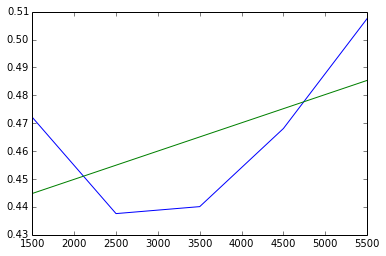

In [19]:
y = meta.loc['Meepo']
model = stats.linregress(x, y)
m = model.slope
c = model.intercept

y_pred = m*x + c
meta.loc['Meepo'].plot()
plt.plot(x, y_pred)
print(m)

In [20]:
heroes

{1: 'antimage',
 2: 'axe',
 3: 'bane',
 4: 'bloodseeker',
 5: 'crystal maiden',
 6: 'drow ranger',
 7: 'earthshaker',
 8: 'juggernaut',
 9: 'mirana',
 10: 'morphling',
 11: 'nevermore',
 12: 'phantom lancer',
 13: 'puck',
 14: 'pudge',
 15: 'razor',
 16: 'sand king',
 17: 'storm spirit',
 18: 'sven',
 19: 'tiny',
 20: 'vengefulspirit',
 21: 'windrunner',
 22: 'zuus',
 23: 'kunkka',
 25: 'lina',
 26: 'lion',
 27: 'shadow shaman',
 28: 'slardar',
 29: 'tidehunter',
 30: 'witch doctor',
 31: 'lich',
 32: 'riki',
 33: 'enigma',
 34: 'tinker',
 35: 'sniper',
 36: 'necrolyte',
 37: 'warlock',
 38: 'beastmaster',
 39: 'queenofpain',
 40: 'venomancer',
 41: 'faceless void',
 42: 'skeleton king',
 43: 'death prophet',
 44: 'phantom assassin',
 45: 'pugna',
 46: 'templar assassin',
 47: 'viper',
 48: 'luna',
 49: 'dragon knight',
 50: 'dazzle',
 51: 'rattletrap',
 52: 'leshrac',
 53: 'furion',
 54: 'life stealer',
 55: 'dark seer',
 56: 'clinkz',
 57: 'omniknight',
 58: 'enchantress',
 59: 'husk